In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [4]:
train_dir = './data/FlagsMashupBot/autoencoder_images/0/'
files = [f for f in os.listdir(train_dir) if not f.startswith('.')]


In [5]:
image_count = len(files)

In [6]:
image_generator = ImageDataGenerator(rescale=1./255)

In [7]:
!pwd

/home/ivan/coding_projects/latent_flag


In [8]:
BATCH_SIZE = 4
IMG_HEIGHT = 128
IMG_WIDTH = 128
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [9]:
train_dir = './data/FlagsMashupBot/autoencoder_images/'
train_data_gen = image_generator.flow_from_directory(train_dir, 
                                    batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                     class_mode='input')

Found 1089 images belonging to 1 classes.


In [10]:
a = next(train_data_gen)

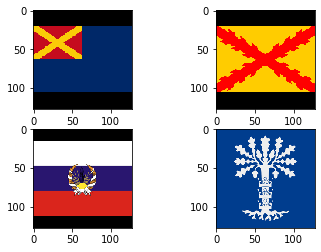

In [11]:
plt.figure()
for i in range(BATCH_SIZE):
    plt.subplot(BATCH_SIZE/2, BATCH_SIZE/2, i+1)
    plt.imshow(a[0][i])

In [12]:
img_width, img_height = IMG_WIDTH, IMG_HEIGHT

In [13]:
input_img = Input(shape=(img_width, img_height, 3))

In [14]:
input_img

<tf.Tensor 'input_1:0' shape=(None, 128, 128, 3) dtype=float32>

In [15]:
conv_shape = (3, 3)

In [16]:
x = Conv2D(16, conv_shape, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, conv_shape, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, conv_shape, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [21]:
encoded

<tf.Tensor 'max_pooling2d_2/Identity:0' shape=(None, 16, 16, 8) dtype=float32>

In [22]:
x = Conv2D(8, conv_shape, activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, conv_shape, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, conv_shape, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, conv_shape, activation='sigmoid', padding='same')(x)

In [23]:
decoded

<tf.Tensor 'conv2d_10/Identity:0' shape=(None, 128, 128, 3) dtype=float32>

In [24]:
autoencoder = Model(input_img, decoded)

In [25]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0   

In [28]:
autoencoder_train = autoencoder.fit(
    train_data_gen, 
    epochs=20, 
    shuffle=True)

  ...
    to  
  ['...']
Train for 273 steps
Epoch 1/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6882
Epoch 2/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6876
Epoch 3/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6871
Epoch 4/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6865
Epoch 5/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6858
Epoch 6/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6851
Epoch 7/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6843
Epoch 8/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6835
Epoch 9/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6826
Epoch 10/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6816
Epoch 11/20
273/273 [==============================] - 2s 7ms/step - loss: 0.6805
Epoch 12/20
273/273 [==============================] - 2s 7ms/

In [29]:
test_images = next(train_data_gen)[0]

In [30]:
pred = autoencoder_train.model.predict(test_images)

In [31]:
pred.shape

(4, 128, 128, 3)

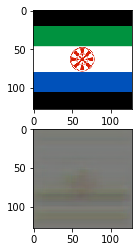

In [32]:
for tr_im, pr_im in zip(test_images, pred):
    plt.figure()
    plt.subplot(2,1,1)
    plt.imshow(tr_im)
    plt.subplot(2,1,2)
    plt.imshow(pr_im)    
    break